<h3><span>📝 </span><span><strong>Procesamiento de Imágenes con OpenCV </strong></span></h3>

En este cuaderno vamos a manipular y analizar imágenes utilizando OpenCV, sin utilizar redes neuronales. 

Aplicaremos técnicas clásicas de visión por computadora para convertir imágenes a escala de grises, detectar bordes, segmentar objetos y medir su tamaño

<h4><span></span><span><strong>2.1 Instalación de Librerías</strong></span></h4>


In [1]:
pip install opencv-python numpy matplotlib scikit-image

  Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached imageio-2.37.0-py3-none-any.whl.metadata (5.2 kB)
  Using cached lazy_loader-0.4-py3-none-any.whl.metadata (7.6 kB)
Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl (39.5 MB)
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   --------------------------------- ------ 10.7/12.9 MB 56.1 MB/s eta 0:00:01
   ---------------------------------------- 12.9/12.9 MB 40.5 MB/s eta 0:00:00
Using cached imageio-2.37.0-py3-none-any.whl (315 kB)
Using cached lazy_loader-0.4-py3-none-any.whl (12 kB)
Using cached networkx-3.4.2-py3-none-any.whl (1.7 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<h4><span> </span><span><strong>2.2 Cargar y Mostrar Imágenes</strong></span></h4>

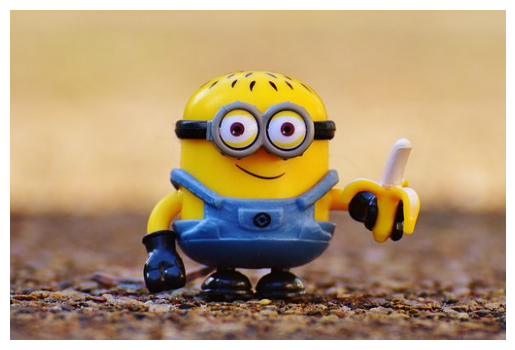

In [236]:
import cv2 #modulo de OpenCV que nos permite operar con la imagen
import matplotlib.pyplot as plt

# Cargar la imagen en color
imagen = cv2.imread("minion.jpg")

# OpenCV (cv2) carga las imágenes en formato BGR (azul-verde-rojo) por defecto, 
# mientras que matplotlib y otras herramientas trabajan con RGB (rojo-verde-azul).
imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

# Mostrar la imagen
plt.imshow(imagen_rgb)
plt.axis("off")
plt.show()

ANOTACIÓN:

1. Imágenes en Escala de Grises (1 Canal)
<ul data-start="233" data-end="469">
<li data-start="233" data-end="371">Una imagen en escala de grises tiene <strong data-start="272" data-end="289">un solo canal</strong>, que representa la <strong data-start="309" data-end="330">intensidad de luz</strong> de cada píxel en valores de <strong data-start="359" data-end="370">0 a 255</strong>.</li>
<li data-start="372" data-end="469"><strong data-start="374" data-end="385">Ejemplo</strong>:
<ul data-start="391" data-end="469">
<li data-start="391" data-end="406"><code data-start="393" data-end="396">0</code> → Negro</li>
<li data-start="409" data-end="427"><code data-start="411" data-end="416">255</code> → Blanco</li>
<li data-start="430" data-end="469">Valores intermedios → Tonos de gris</li>
</ul>
</li>
</ul>

2. Imágenes a Color (3 Canales: RGB o BGR)
Una imagen a color está compuesta por tres canales:


<ul data-start="764" data-end="824">
<li data-start="764" data-end="783"><strong data-start="766" data-end="778">Rojo (R)</strong> 🔴</li>
<li data-start="784" data-end="804"><strong data-start="786" data-end="799">Verde (G)</strong> 🟢</li>
<li data-start="805" data-end="824"><strong data-start="807" data-end="819">Azul (B)</strong> 🔵</li>
</ul>
<p data-start="826" data-end="920">Cada píxel tiene <strong data-start="843" data-end="859">tres valores</strong>, uno por cada color, que combinados forman el color final.</p>
<p data-start="922" data-end="967">🔍 <strong data-start="925" data-end="965">Ejemplo de un píxel con valores RGB:</strong></p>
<pre class="!overflow-visible" data-start="968" data-end="1124"></span><span><span class="hljs-meta">[R, G, B</span></span><span>] = [</span><span><span class="hljs-number">255</span></span><span>, </span><span><span class="hljs-number">0</span></span><span>, </span><span><span class="hljs-number">0</span></span><span>]  → Rojo
[</span><span><span class="hljs-meta">R, G, B</span></span><span>] = [</span><span><span class="hljs-number">0</span></span><span>, </span><span><span class="hljs-number">255</span></span><span>, </span><span><span class="hljs-number">0</span></span><span>]  → Verde
[</span><span><span class="hljs-meta">R, G, B</span></span><span>] = [</span><span><span class="hljs-number">0</span></span><span>, </span><span><span class="hljs-number">0</span></span><span>, </span><span><span class="hljs-number">255</span></span><span>]  → Azul
[</span><span><span class="hljs-meta">R, G, B</span></span><span>] = [</span><span><span class="hljs-number">255</span></span><span>, </span><span><span class="hljs-number">255</span></span><span>, </span><span><span class="hljs-number">0</span></span><span>] → Amarillo (Rojo + Verde)
</span></span>



<h4><span> </span><span><strong>2.3 Convertir a Escala de Grises</strong></span></h4>

La detección de bordes y contornos funciona mejor en imágenes monocromáticas.

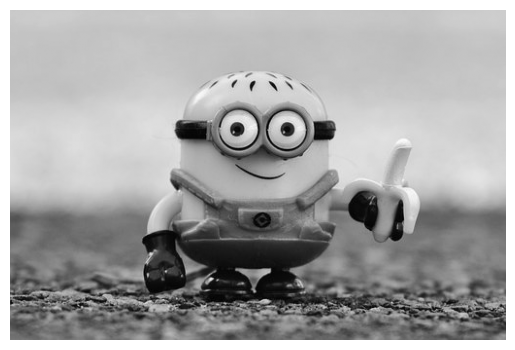

In [237]:
imagen_gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
plt.imshow(imagen_gris, cmap='gray')
plt.axis("off")
plt.show()

<h4><span> </span><span><strong>2.4 Detección de Bordes con Canny</strong></span></h4>

*bordes = cv2.Canny(imagen_gris, 100, 200)*


Los números 100 y 200 son umbrales que controlan la detección de bordes en el algoritmo de Canny. 
El gradiente en una imagen mide cómo cambia la intensidad de los píxeles en una dirección específica. Es decir:

    Si un área tiene píxeles con valores similares, el gradiente es bajo.
    Si hay un cambio brusco en la intensidad (por ejemplo, de negro a blanco), el gradiente es alto.


<table data-start="733" data-end="1041" node="[object Object]"><thead data-start="733" data-end="782"><tr data-start="733" data-end="782"><th data-start="733" data-end="746">Parámetros</th><th data-start="746" data-end="782">Efecto en la detección de bordes</th></tr></thead><tbody data-start="832" data-end="1041"><tr data-start="832" data-end="890"><td><code data-start="834" data-end="843">50, 150</code></td><td>Se detectan más bordes, incluyendo ruido.</td></tr><tr data-start="891" data-end="963"><td><code data-start="893" data-end="903">100, 200</code></td><td>Configuración estándar, bordes nítidos sin mucho ruido.</td></tr><tr data-start="964" data-end="1041"><td><code data-start="966" data-end="976">150, 250</code></td><td>Se detectan solo bordes muy marcados, puede perder detalles.</td></tr></tbody></table>

(-0.5, 510.5, 339.5, -0.5)

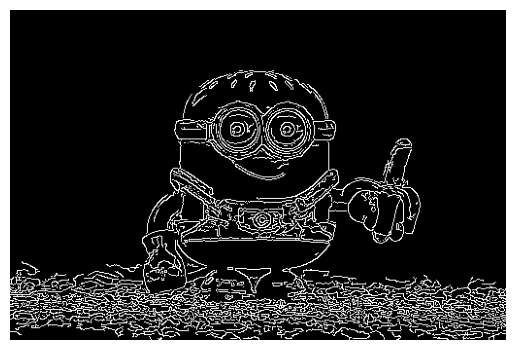

In [238]:
bordes = cv2.Canny(image=imagen_gris, threshold1=40, threshold2=90)
plt.imshow(bordes, cmap='gray')
plt.axis("off")

<h4><span> </span><span><strong>2.5 Detección y Contado de Objetos con Umbralización</strong></span></h4>

**cv2.findContours**

Argumentos de entrada la función cv2.findContours:
- Image (Imagen binaria)
- Mode (Modo de recuperación del contorno)
- Method (Método de aproximación del contorno)


<strong>Mode (Modo de recuperación del contorno)</strong>
La jerarquía de contornos demuestra la relación que tienen los contornos. Podemos tener el caso en que tengamos un contorno y dentro de este se encuentre otro, y dentro otro. Por ejemplo, un contorno externo es padre, mientras que el interno es hijo.

Teniendo esto en cuenta veamos cada uno de los modos de recuperación de contornos:

<ul>
<li><strong>cv2.RETR_EXTERNAL:</strong> Recupera los contornos extremos. Solo los mayores de la familia, no el resto.</li>
<li><strong>cv2.RETR_LIST:</strong> Recupera todos los contornos sin establecer jerarquía (ninguna relación padre hijo).</li>
<li><strong>cv2.RETR_CCOMP:</strong> Organiza los contornos en jerarquía de dos niveles. Es decir que si tenemos un contorno externo tendrá jerarquía 1, y uno interno jerarquía 2. Si este a su vez tiene otro contorno tendrá jerarquía 1.</li>
<li><strong>cv2.RETR_TREE:</strong> Recupera todos los contornos con sus jerarquías.</li>
</ul>

<strong>Method (Método de aproximación del contorno)</strong>

En cuanto a los métodos de aproximación del contorno veremos: cv2.CHAIN_APPROX_NONE y cv2.CHAIN_APPROX_SIMPLE. En ambos casos se procederá a almacenar los puntos x e y, correspondientes a cada contorno encontrado, la diferencia está en la cantidad de puntos que se almacenan. 

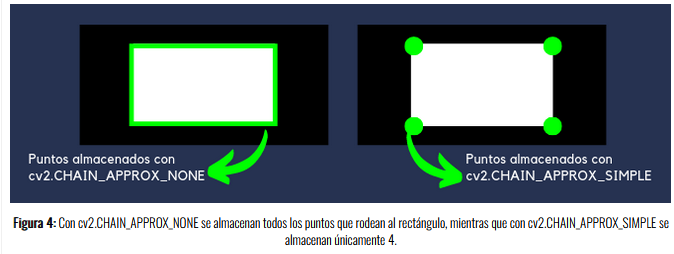

<ul>
<li><strong>cv2.CHAIN_APPROX_NONE:</strong> Almacena todos los puntos del contorno.</li>
<li><strong>cv2.CHAIN_APPROX_SIMPLE:</strong> Comprime segmentos horizontales, verticales y diagonales y deja solo sus puntos finales, ahorrando memoria al no almacenar puntos redundantes.</li>
</ul>

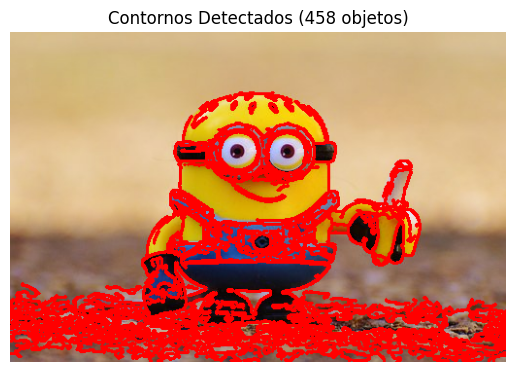

Objetos detectados: 458


In [241]:
# Encontrar contornos en la imagen teniendo en cuenta que son monedas
contornos, _ = cv2.findContours(bordes, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Dibujar los contornos en la imagen
imagen_contornos = imagen_rgb.copy()
cv2.drawContours(imagen_contornos, contornos, -1, (255, 0, 0), 2)

# Mostrar la imagen con los contornos detectados
# plt.imshow(imagen_contornos)
# plt.axis("off")
# plt.title(f"Contornos Detectados ({len(contornos)} objetos)")
# plt.show()


# Dibujar los contornos filtrados en la imagen
imagen_contornos_filtrados = imagen_rgb.copy()
cv2.drawContours(imagen_contornos_filtrados, contornos, -1, (255, 0, 0), 2)

# Mostrar la imagen con los contornos detectados
plt.imshow(imagen_contornos_filtrados)
plt.axis("off")
plt.title(f"Contornos Detectados ({len(contornos)} objetos)")
plt.show()

print(f"Objetos detectados: {len(contornos)}")


<h4><span> </span><span><strong> 2.6 Medición del Tamaño de un Objeto</strong></span></h4>

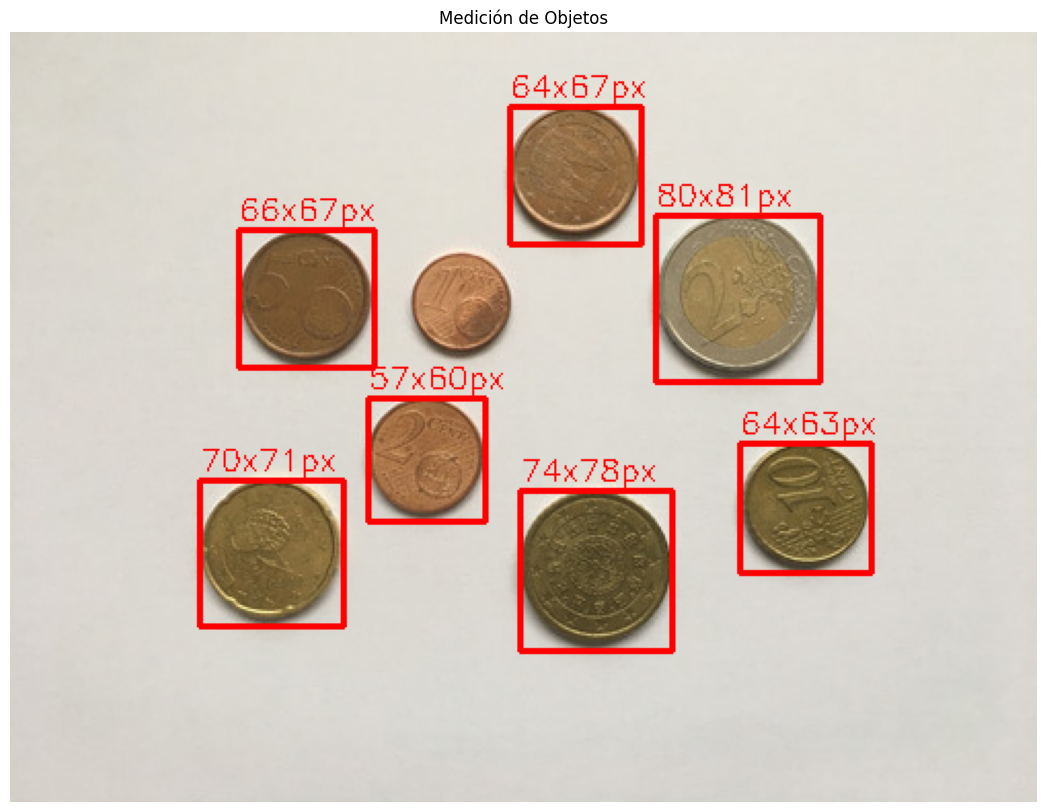

In [208]:
# Copiar imagen original
imagen_medicion = imagen_rgb.copy()

for contorno in contornos_filtrados:
    # Obtener el rectángulo delimitador de cada objeto
    x, y, w, h = cv2.boundingRect(contorno)

    # Dibujar rectángulo en azul
    cv2.rectangle(imagen_medicion, (x, y), (x + w, y + h), (255, 0, 0), 2)

    # Mostrar dimensiones en la imagen
    cv2.putText(imagen_medicion, f"{w}x{h}px", (x, y - 5),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

# Mostrar imagen con medidas
plt.figure(figsize=(100, 10)) 
plt.imshow(imagen_medicion)
plt.axis("off")
plt.title("Medición de Objetos")
plt.show()


EJERCICIOS


1️⃣ Modificar los parámetros del detector de bordes (Canny) y observar los cambios.

2️⃣ Probar diferentes valores de umbralización para mejorar la detección de objetos.

3️⃣ Prueba ahora con las imagenes proporcionadas y saca conclusiones